In [1]:
#Importing all the libraries
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import string
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing training dataset
train = pd.read_csv('train.csv')

In [3]:
#shape of training dataset
train.shape

(40000, 2)

In [4]:
#checking whether duplicate rows exist or not
train.duplicated().sum()

277

In [5]:
#dropping all duplicate vales
train = train.drop_duplicates()

In [6]:
#rows have been reduced since there were duplicate values
train.shape

(39723, 2)

In [7]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [8]:
#checking null values exist or not
train.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
#calculating length before data cleaning
train['text_len'] = train['text'].apply(len)

In [10]:
def text_process(review):
    soup = BeautifulSoup(review, "html.parser")
    review = soup.get_text(separator = ' ')
    nopunc = [line for line in review if line not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.split()
    reviews = [word for word in nopunc if word.lower() not in stopwords.words('english')]
    return ' '.join(reviews)

In [11]:
#data cleaning - removing html tags, stopwords
train['new_text'] = train['text'].apply(text_process)

In [12]:
#calculating length after data cleaning
train['new_text_len'] = train['new_text'].apply(len)

In [13]:
train.head()

,text,label,text_len,new_text,new_text_len
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving Thunderbirds mates...,615
1,"When I put this movie in my DVD player, and sa...",0,1811,put movie DVD player sat coke chips expectatio...,1108
2,Why do people who do not know what a particula...,0,983,people know particular time past like feel nee...,637
3,Even though I have great interest in Biblical ...,0,351,Even though great interest Biblical movies bor...,212
4,Im a die hard Dads Army fan and nothing will e...,1,983,Im die hard Dads Army fan nothing ever change ...,658


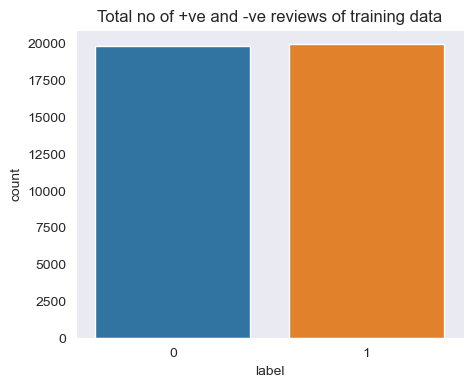

In [14]:
sns.set_style('dark')
plt.figure(figsize=(5,4))
plt.title('Total no of +ve and -ve reviews of training data')
sns.countplot(train['label'])
plt.show()

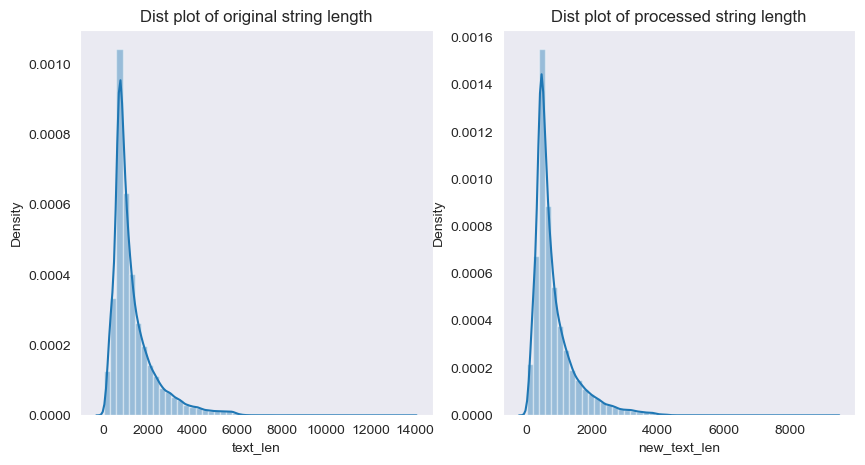

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(train['text_len'], ax=axs[0])
axs[0].set_title('Dist plot of original string length')
sns.distplot(train['new_text_len'], ax=axs[1])
axs[1].set_title('Dist plot of processed string length')
plt.show()

In [16]:
#importing testing dataset
test = pd.read_csv('test.csv')

In [17]:
#shape of testing dataset
test.shape

(5000, 2)

In [18]:
#checking whether duplicate rows exist or not
test.duplicated().sum()

5

In [19]:
#dropping all duplicate vales
test = test.drop_duplicates()

In [20]:
#rows have been reduced since there were duplicate values
test.shape

(4995, 2)

In [21]:
#calculating length before data cleaning
test['text_len'] = test['text'].apply(len)

In [25]:
#data cleaning - removing html tags, stopwords
test['new_text'] = test['text'].apply(text_process)

In [26]:
#calculating length after data cleaning
test['new_text_len'] = test['new_text'].apply(len)

In [27]:
test.head()

,text,label,text_len,new_text,new_text_len
0,I always wrote this series off as being a comp...,0,2105,always wrote series complete stinkfest Jim Bel...,1340
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,1st watched 1272002 3 10DirSteve Purcell Typic...,639
2,This movie was so poorly written and directed ...,0,1402,movie poorly written directed fell asleep 30 m...,780
3,The most interesting thing about Miryang (Secr...,1,4277,interesting thing Miryang Secret Sunshine acto...,2824
4,"when i first read about ""berlin am meer"" i did...",0,1013,first read berlin meer didnt expect much thoug...,640


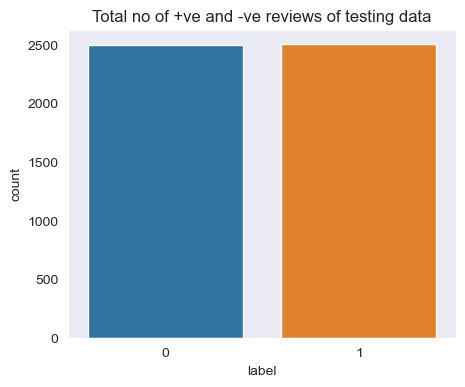

In [28]:
plt.figure(figsize=(5,4))
plt.title('Total no of +ve and -ve reviews of testing data')
sns.countplot(test['label'])
plt.show()

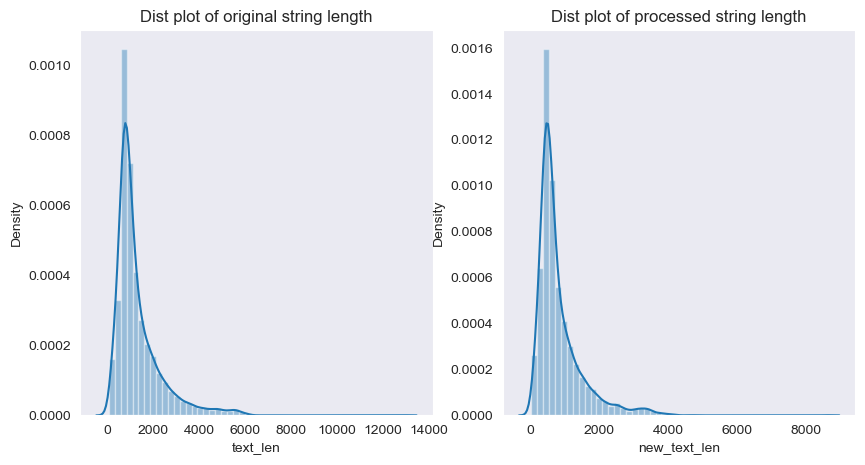

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(test['text_len'], ax=axs[0])
axs[0].set_title('Dist plot of original string length')
sns.distplot(test['new_text_len'], ax=axs[1])
axs[1].set_title('Dist plot of processed string length')
plt.show()

In [30]:
#creating the pipeline so that data does not leak as there are so many steps involved
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [31]:
#separating x_train, y_train,x_test, y_test
x_train = train['new_text']
x_test = test['new_text']
y_train = train['label'] 
y_test = test['label']

In [32]:
#fitting x_train, y_train into model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function text_process at 0x0000026F0CF26670>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [33]:
pred = pipeline.predict(x_test)

In [34]:
accuracy_score(y_test, pred)

0.6334334334334334

In [36]:
print(confusion_matrix(y_test, pred))

[[1363 1130]
 [ 701 1801]]


In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60      2493
           1       0.61      0.72      0.66      2502

    accuracy                           0.63      4995
   macro avg       0.64      0.63      0.63      4995
weighted avg       0.64      0.63      0.63      4995



In [38]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

In [39]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function text_process at 0x0000026F0CF26670>)),
                ('tfidf', TfidfTransformer()), ('clf', LogisticRegression())])

In [40]:
pred1 = pipeline.predict(x_test)

In [41]:
accuracy_score(y_test, pred1)

0.6526526526526526

In [42]:
print(confusion_matrix(y_test, pred1))

[[1596  897]
 [ 838 1664]]


In [43]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2493
           1       0.65      0.67      0.66      2502

    accuracy                           0.65      4995
   macro avg       0.65      0.65      0.65      4995
weighted avg       0.65      0.65      0.65      4995



In [44]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [45]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function text_process at 0x0000026F0CF26670>)),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])

In [46]:
pred2 = pipeline.predict(x_test)

In [47]:
#linearsvc has achived the maximum accuracy among all the algorithms
accuracy_score(y_test, pred2)

0.6576576576576577

In [48]:
print(confusion_matrix(y_test, pred2))

[[1619  874]
 [ 836 1666]]


In [49]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      2493
           1       0.66      0.67      0.66      2502

    accuracy                           0.66      4995
   macro avg       0.66      0.66      0.66      4995
weighted avg       0.66      0.66      0.66      4995



In [50]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

In [51]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function text_process at 0x0000026F0CF26670>)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [52]:
pred3 = pipeline.predict(x_test)

In [53]:
accuracy_score(y_test, pred3)

0.6368368368368368

In [54]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      2493
           1       0.64      0.64      0.64      2502

    accuracy                           0.64      4995
   macro avg       0.64      0.64      0.64      4995
weighted avg       0.64      0.64      0.64      4995



In [55]:
print(confusion_matrix(y_test, pred3))

[[1570  923]
 [ 891 1611]]
